In [160]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, LogLocator
# Load the JSON file
data = pd.read_json('../generated/VUEs.json')

# Convert to a DataFrame
df = pd.DataFrame(data)

# Normalize the 'revisedProteinEffects' column
normalized_dfs = []
for index, row in df.iterrows():
    normalized_row = pd.json_normalize(row['revisedProteinEffects'])
    print(normalized_row)

                    variant  \
0  4:g.55593576_55593606del   
1  4:g.55593580_55593606del   
2  4:g.55593578_55593606del   

                                     genomicLocation     transcriptId  \
0  4,55593576,55593606,CCACAGAAACCCATGTATGAAGTACA...  ENST00000288135   
1  4,55593580,55593606,AGAAACCCATGTATGAAGTACAGTGGA,-  ENST00000288135   
2  4,55593578,55593606,ACAGAAACCCATGTATGAAGTACAGT...  ENST00000288135   

  vepPredictedProteinEffect vepPredictedVariantClassification  \
0             p.X550_splice                       Splice_Site   
1             p.X550_splice                       Splice_Site   
2             p.X550_splice                       Splice_Site   

  revisedProteinEffect     revisedVariantClassification  \
0       p.K550_K558del  Splice_Exon_Shortening_In_Frame   
1       p.K550_K558del  Splice_Exon_Shortening_In_Frame   
2       p.K550_K558del  Splice_Exon_Shortening_In_Frame   

  revisedStandardVariantClassification                               hgvsc  \
0     

In [161]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, LogLocator

# Load the JSON file
data = pd.read_json('../generated/VUEs.json')

# Convert to a DataFrame
df = pd.DataFrame(data)


# Normalize the 'revisedProteinEffects' column
normalized_dfs = []
for index, row in df.iterrows():
    normalized_row = pd.json_normalize(row['revisedProteinEffects'])
    repeated_row = pd.DataFrame([row.drop('revisedProteinEffects')] * len(normalized_row)).reset_index(drop=True)
    combined = pd.concat([repeated_row.reset_index(drop=True), normalized_row], axis=1).reset_index(drop=True)
    normalized_dfs.append(combined)

# Determine the union of all column names
all_columns = set()
for df in normalized_dfs:
    all_columns.update(df.columns)

# Reindex each DataFrame to include all columns, filling missing values with NaN
all_columns = list(all_columns)
for i, df in enumerate(normalized_dfs):
    normalized_dfs[i] = df.loc[:, ~df.columns.duplicated()].reindex(columns=all_columns)

# Concatenate all normalized DataFrames
result_df = pd.concat(normalized_dfs, ignore_index=True)
# make anything CountByVariantCount 0
count_cancer_type_columns = [col for col in result_df.columns if 'CountByCancerType' in col]
result_df[count_cancer_type_columns] = result_df[count_cancer_type_columns].fillna(0).astype(int)

In [162]:
# hardcoded set o fgene swith highest level (manually determined with
# mutationmapper, and just looking upn genes in OncoKB)
highest_level_per_gene = {
    "KIT": "Level 1",
    "MET": "Level 1",
    "FLT3": "Level 1",
    "ATM": "Level 1",
    "BRCA1": "Level 1",
    "BRCA2": "Level 1",
    "BRIP1": "Level 1",
    "CHEK2": "Level 1",
    "PALB2": "Level 1",
    "RAD51D": "Level 1",
    "MLH1": "Level 1",
    "EGFR": "Level 1",
    "KRAS": "Level 1",
}

In [163]:
result_df

,counts.genie.somaticVariantsCountByCancerType.Salivary Gland Cancer,counts.total.somaticVariantsCountByCancerType.Breast Cancer,counts.tcga.unknownVariantsCountByCancerType.Colorectal Cancer,counts.mskimpact.somaticVariantsCountByCancerType.Non-Small Cell Lung Cancer,counts.tcga.unknownVariantsCountByCancerType.Endometrial Cancer,counts.mskimpact.unknownVariantsCount,counts.mskimpact.somaticVariantsCountByCancerType.Mesothelioma,counts.total.unknownVariantsCountByCancerType.Glioma,counts.mskimpact.somaticVariantsCountByCancerType.Thyroid Cancer,counts.total.germlineVariantsCountByCancerType.Tubular Adenoma of the Colon,...,"counts.total.somaticVariantsCountByCancerType.Peritoneal Cancer, NOS",counts.total.somaticVariantsCountByCancerType.Gastrointestinal Neuroendocrine Tumor,counts.total.unknownVariantsCountByCancerType.Renal Clear Cell Carcinoma,counts.mskimpact_nonsignedout.unknownVariantsCountByCancerType.Hepatobiliary Cancer,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Small Cell Lung Cancer,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Tubular Adenoma of the Colon,counts.total.germlineVariantsCountByCancerType.Bladder Cancer,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Melanoma,counts.mskimpact.totalPatientCount,counts.mskimpact.germlineVariantsCountByCancerType.Endometrial Cancer
0,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,70067.0,0
1,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,70067.0,0
2,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,70067.0,0
3,0,0,0,0,0,0.0,0,0,0,0,...,0,1,0,0,0,4,0,0,70067.0,0
4,0,0,0,0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,70067.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,70067.0,0
106,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,70067.0,0
107,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,70067.0,0
108,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,70067.0,0


In [164]:

print(set([c for c in result_df.columns if "CancerType" in c]))

{'counts.genie.somaticVariantsCountByCancerType.Salivary Gland Cancer', 'counts.tcga.unknownVariantsCountByCancerType.Endometrial Cancer', 'counts.mskimpact.somaticVariantsCountByCancerType.Non-Small Cell Lung Cancer', 'counts.total.somaticVariantsCountByCancerType.Breast Cancer', 'counts.tcga.unknownVariantsCountByCancerType.Colorectal Cancer', 'counts.total.unknownVariantsCountByCancerType.Glioma', 'counts.mskimpact.somaticVariantsCountByCancerType.Mesothelioma', 'counts.mskimpact.somaticVariantsCountByCancerType.Thyroid Cancer', 'counts.total.germlineVariantsCountByCancerType.Tubular Adenoma of the Colon', 'counts.total.somaticVariantsCountByCancerType.Thyroid Cancer', 'counts.genie.somaticVariantsCountByCancerType.Breast Cancer', 'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Peritoneal Cancer, NOS', 'counts.total.somaticVariantsCountByCancerType.Adrenocortical Carcinoma', 'counts.genie.unknownVariantsCountByCancerType.Non-Small Cell Lung Cancer', 'counts.total.som

In [165]:
cancer_types = set([c.split('.')[-1] for c in result_df.columns if "CancerType" in c])
print(len(cancer_types))

46


In [166]:
# Custom function to calculate the sum
def custom_sum(row):
    result = {}
    for study in "tcga mskimpact mskimpact_nonsignedout genie total".split():
        result[study] = (
            row[f'counts.{study}.somaticVariantsCount'].sum() +
            row[f'counts.{study}.germlineVariantsCount'].sum() +
            row[f'counts.{study}.unknownVariantsCount'].sum()
        )
        # result[f'{study}.totalPatientCount'] = row[f'counts.{study}.totalPatientCount'].values[0]
        
    for cancer_type in cancer_types:
        result[f'counts.CancerType.{cancer_type}'] = 0
        for study in "total".split():
            result[f'counts.CancerType.{cancer_type}'] += (
                row.get(f'counts.{study}.somaticVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
                row.get(f'counts.{study}.germlineVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
                row.get(f'counts.{study}.unknownVariantsCountByCancerType.{cancer_type}', np.array(0)).sum()
            )
    return pd.Series(result)

# Group by 'hugoGeneSymbol' and apply custom function
grouped_df = result_df.groupby('hugoGeneSymbol').apply(custom_sum)

# Add additional columns
grouped_df['Number of VUEs'] = result_df.groupby('hugoGeneSymbol').size()
grouped_df['total_variant_count'] = grouped_df['total']
grouped_df['Highest_Level'] = grouped_df.index.map(highest_level_per_gene).fillna('Oncogenic')
grouped_df['total_patient_count'] = grouped_df['total_variant_count']


In [167]:
grouped_df.loc['KIT']

tcga                                                           0.0
mskimpact                                                     11.0
mskimpact_nonsignedout                                         0.0
genie                                                         16.0
total                                                         16.0
counts.CancerType.Soft Tissue Sarcoma                          0.0
counts.CancerType.Esophagogastric Cancer                       0.0
counts.CancerType.Prostate Cancer                              0.0
counts.CancerType.Ampullary Cancer                             0.0
counts.CancerType.Bladder Cancer                               0.0
counts.CancerType.Renal Clear Cell Carcinoma                   0.0
counts.CancerType.Peritoneal Cancer, NOS                       0.0
counts.CancerType.Appendiceal Cancer                           0.0
counts.CancerType.B-Lymphoblastic Leukemia/Lymphoma            0.0
counts.CancerType.Bone Cancer                                 

In [168]:
# TODO: BAP1 not found (should be in TCGA-B0-4842-01 but it's not there: https://cancer.sanger.ac.uk/cosmic/sample/overview?id=1779818)
# TODO: FLT3 is in heme 3 times (1 sample)
# TODO: RAD51D once in ccle_broad_2019
zero_variant_cases = grouped_df[grouped_df['total'] == 0]
print("There are {} VUEs with 0 variants".format(len(zero_variant_cases)))
print(zero_variant_cases)

There are 0 VUEs with 0 variants
Empty DataFrame
Columns: [tcga, mskimpact, mskimpact_nonsignedout, genie, total, counts.CancerType.Soft Tissue Sarcoma, counts.CancerType.Esophagogastric Cancer, counts.CancerType.Prostate Cancer, counts.CancerType.Ampullary Cancer, counts.CancerType.Bladder Cancer, counts.CancerType.Renal Clear Cell Carcinoma, counts.CancerType.Peritoneal Cancer, NOS, counts.CancerType.Appendiceal Cancer, counts.CancerType.B-Lymphoblastic Leukemia/Lymphoma, counts.CancerType.Bone Cancer, counts.CancerType.Breast Cancer, counts.CancerType.Anal Cancer, counts.CancerType.Hepatobiliary Cancer, counts.CancerType.Retinoblastoma, counts.CancerType.Skin Cancer, Non-Melanoma, counts.CancerType.Small Bowel Cancer, counts.CancerType.Cervical Cancer, counts.CancerType.Gastrointestinal Neuroendocrine Tumor, counts.CancerType.Non-Small Cell Lung Cancer, counts.CancerType.Adrenocortical Carcinoma, counts.CancerType.Cancer of Unknown Primary, counts.CancerType.Glioma, counts.CancerTyp

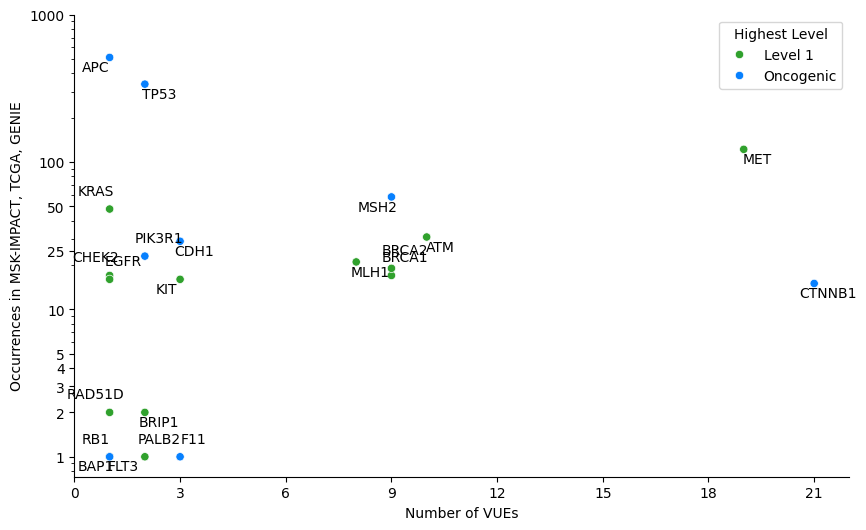

In [169]:
from matplotlib.ticker import MaxNLocator, LogLocator, ScalarFormatter

# Create the scatter plot
plt.figure(figsize=(10, 6))


palette = {"Level 1": "#30A12D", "Level 2": "#1f78b4", "Oncogenic": "#0780FE"}

scatter_plot = sns.scatterplot(data=grouped_df, x='Number of VUEs', y='total_variant_count', hue="Highest_Level", palette=palette)

# Despine the plot
sns.despine()

# Set x-axis to display integers only
scatter_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
# Set y-axis to log scale
scatter_plot.set_yscale('log')
# Manually set y-axis ticks
scatter_plot.set_yticks([1, 2, 3, 4, 5, 10, 25, 50, 100, 1000])
scatter_plot.get_yaxis().set_major_formatter(ScalarFormatter())


# Add labels and title
scatter_plot.set_xlabel('Number of VUEs')
scatter_plot.set_ylabel('Occurrences in MSK-IMPACT, TCGA, GENIE')

# Reorder the legend handles and labels
handles, labels = scatter_plot.get_legend_handles_labels()
handles = [handles[1], handles[0]]  # Swap the order of handles
labels = [labels[1], labels[0]]  # Swap the order of labels
# Update the legend
scatter_plot.legend(handles, labels, title="Highest Level", loc="upper right")

# Add annotations for each point with gene symbols
texts = []
for i, row in grouped_df.iterrows():
    # Add some randomness to the initial text position
    x_offset = np.random.choice([-10,10])
    y_offset = np.random.choice([10, -10])
    texts.append(scatter_plot.annotate(row.name, 
                          (row['Number of VUEs'], row['total']),
                          textcoords="offset points", xytext=(x_offset, y_offset), ha='center', fontsize=10))

plt.savefig("revue_occurrence_plot.svg", format='svg')

# Show the plot
plt.show()


In [153]:
# cancer_type_counts = pd.read_csv('./cancer_type_revue_counts.txt', sep='\t').groupby('Cancer Type')['Patient ID'].nunique()
# cancer_type_counts.head()


cancer_type_counts_df = pd.read_csv('./cancer_type_revue_counts.txt', sep='\t')
# Filter out rows where 'Patient ID' starts with 'TCGA'
cancer_type_counts = cancer_type_counts_df[cancer_type_counts_df['Study ID'].str.startswith('mskimpact')]
# print(cancer_type_counts)
cancer_type_counts = cancer_type_counts.groupby('Cancer Type')['Patient ID'].nunique()
print(cancer_type_counts)
# Save the result to a new file (or overwrite the original if you prefer)
# cancer_type_counts_out.to_csv('filtered_file.tsv', sep='\t', index=False)

Cancer Type
Adenocarcinoma In Situ                               4
Adrenal Gland Cancer                                 2
Adrenocortical Adenoma                               6
Adrenocortical Carcinoma                           120
Ampullary Cancer                                   208
                                                  ... 
Undifferentiated Embryonal Sarcoma of the Liver      5
Uterine Sarcoma                                    560
Vaginal Cancer                                     100
Vulvar Carcinoma                                     1
Wilms Tumor                                         92
Name: Patient ID, Length: 90, dtype: int64


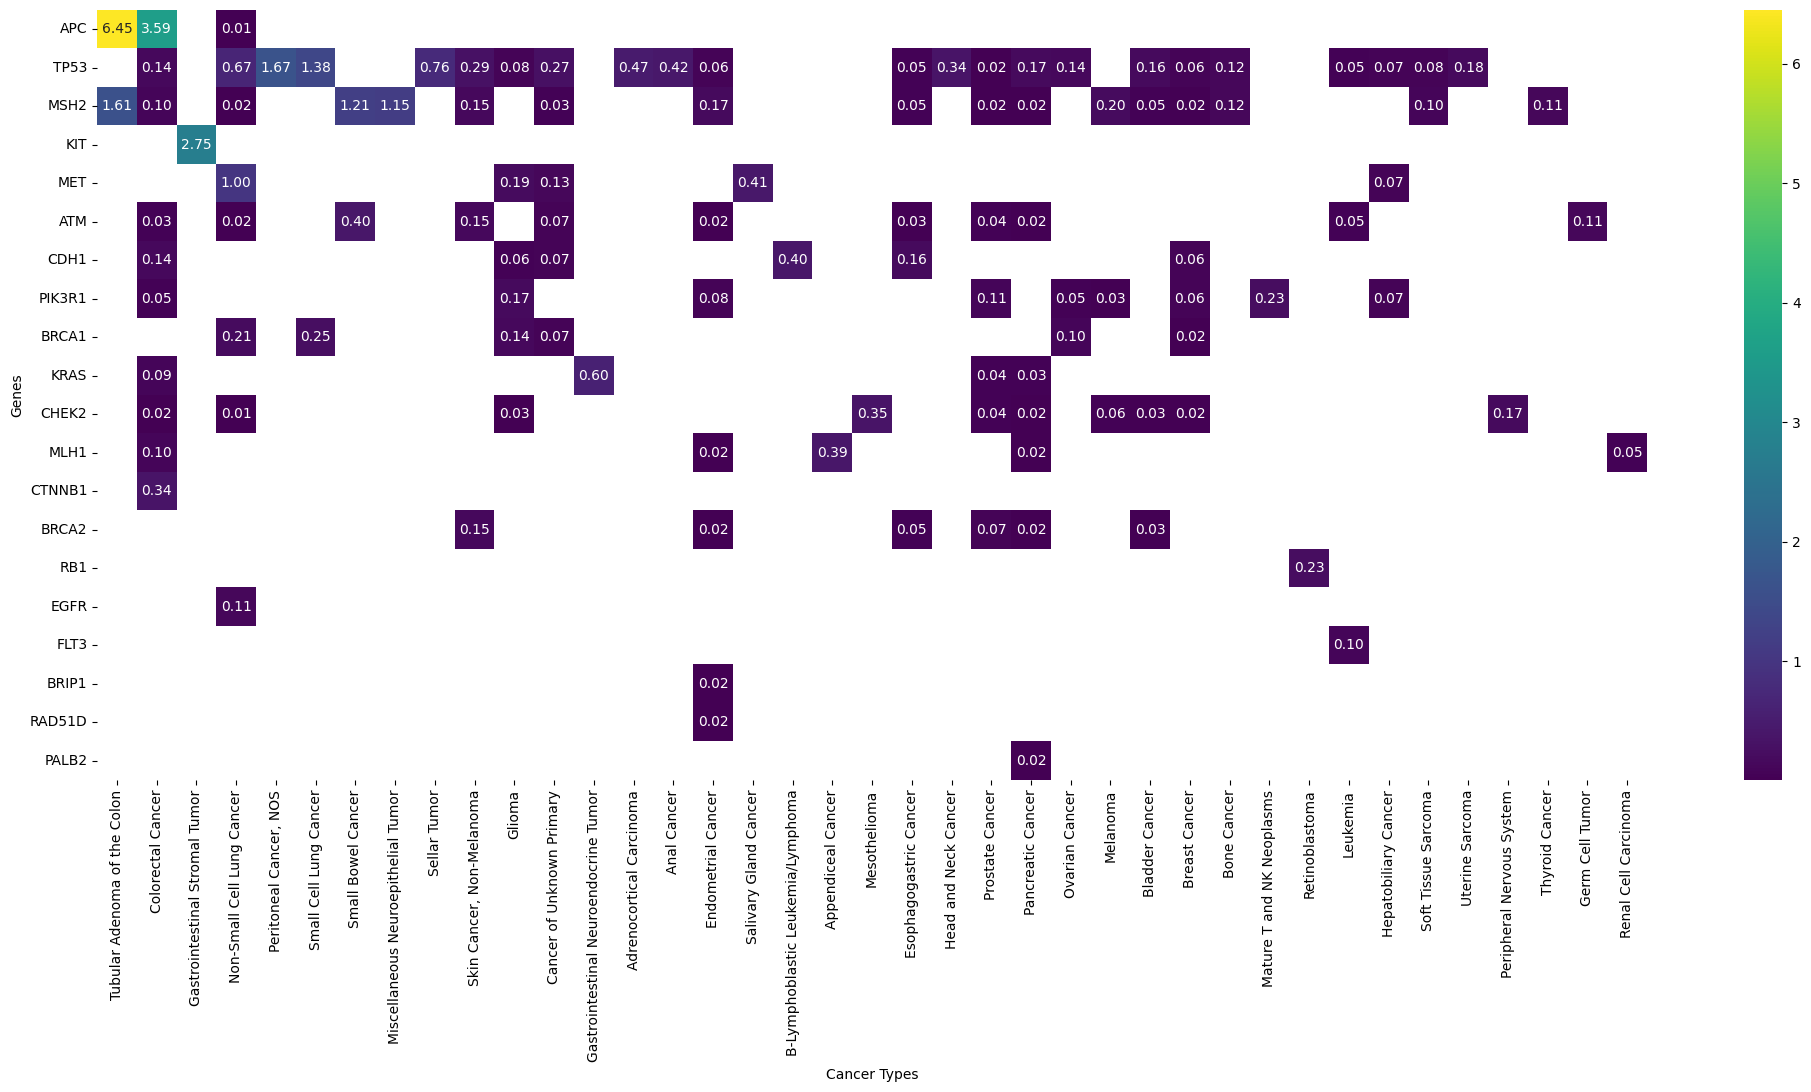

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming grouped_df is already created and contains the necessary data

# Extract the relevant columns for the heatmap
heatmap_data = grouped_df.filter(like='counts.CancerType')
heatmap_data.columns = [col.replace('counts.CancerType.', '') for col in heatmap_data.columns]

# Pivot the DataFrame to have genes as columns and cancer types as rows
heatmap_data = heatmap_data

# Filter out rows that sum up to 0
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1) != 0]

# Normalize the counts by the total counts for each cancer type using cancer_type_counts
for col in heatmap_data.columns:
    heatmap_data[col] = heatmap_data[col] * 100.0 / cancer_type_counts.loc[col]

# Sort the rows and columns by the sum of their values
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]
heatmap_data = heatmap_data[heatmap_data.sum(axis=0).sort_values(ascending=False).index]

# Create a mask for cells that are 0
mask = heatmap_data == 0

# Plot the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', mask=mask)
# plt.title('Heatmap of Genes vs Cancer Types')
plt.xlabel('Cancer Types')
plt.ylabel('Genes')
plt.show()

In [170]:
import os
# count the number of unique patients by cancer type and cohort
COHORTS = {
    "mskimpact": {
        "clinical": "../scripts/files/mskimpact/mskimpact_data_clinical_sample.txt",
        "gene_panel_col": "GENE_PANEL",
        "target_panels": ["IMPACT341", "IMPACT410", "IMPACT468", "IMPACT505"]
    },
    "mskimpact_nonsignedout": {
        "clinical": "../scripts/files/mskimpact_nonsignedout/data_clinical_sample.txt",
        "gene_panel_col": "GENE_PANEL",
        "target_panels": ["IMPACT341", "IMPACT410", "IMPACT468", "IMPACT505"]
    },
    "genie": {
        "clinical": "../scripts/files/genie/genie_data_clinical_sample.txt",
        "gene_panel_col": "SEQ_ASSAY_ID",
        "target_panels": None
    },
    "tcga": {
        "folder": "../scripts/files/tcga",
        "gene_panel_col": None,
        "target_panels": None
    }
}

def read_clinical_df(path, gene_panel_col=None, target_panels=None):
    patien_count_df = pd.read_csv(path, sep="\t", low_memory=False)
    if target_panels and gene_panel_col and gene_panel_col in patien_count_df.columns:
        patien_count_df = patien_count_df[patien_count_df[gene_panel_col].isin(target_panels)]
    patien_count_df[['PATIENT_ID']] = patien_count_df[['PATIENT_ID']].apply(
        lambda col: col.str.replace("GENIE-MSK-", "", regex=False)
    )
    return patien_count_df[['PATIENT_ID', 'CANCER_TYPE']].drop_duplicates()

cohort_clinical_data = {}

for cohort, config in COHORTS.items():
    print(f"Loading {cohort}...")
    if cohort == "tcga":
        clinical_files = [
            os.path.join(config["folder"], f)
            for f in os.listdir(config["folder"])
            if f.endswith("_clinical_samples.txt")
        ]
        df_list = [
            read_clinical_df(path, config.get("gene_panel_col"), config.get("target_panels"))
            for path in clinical_files
        ]
        clinical_df = pd.concat(df_list, ignore_index=True)
    else:
        clinical_df = read_clinical_df(
            config["clinical"],
            config.get("gene_panel_col"),
            config.get("target_panels")
        )
    cohort_clinical_data[cohort] = clinical_df

result_data = {}

for cohort, patien_count_df in cohort_clinical_data.items():
    counts = patien_count_df.groupby("CANCER_TYPE")["PATIENT_ID"].nunique().to_dict()
    for cancer_type, count in counts.items():
        result_data[f"{cohort}.{cancer_type}"] = count

# Compute combined counts
# mskimpact_combined: mskimpact + mskimpact_nonsignedout
# mskimpact_genie_combined: mskimpact + mskimpact_nonsignedout + genie
# total: mskimpact + mskimpact_nonsignedout + genie + tcga
combined_groups = {
    "mskimpact_combined": ["mskimpact", "mskimpact_nonsignedout"],
    "mskimpact_genie_combined": ["mskimpact", "mskimpact_nonsignedout", "genie"],
    "total": list(cohort_clinical_data.keys())
}

for combined_label, members in combined_groups.items():
    combined_df = pd.concat([cohort_clinical_data[c] for c in members], ignore_index=True)
    counts = combined_df.groupby("CANCER_TYPE")["PATIENT_ID"].nunique().to_dict()
    for cancer_type, count in counts.items():
        result_data[f"{combined_label}.{cancer_type}"] = count

patien_count_df_out = pd.DataFrame.from_dict(result_data, orient="index", columns=["patient_count"])
patien_count_df_out.index.name = "Cohort.CancerType"
patien_count_df_out.sort_index(inplace=True)
patien_count_df_out

Loading mskimpact...
Loading mskimpact_nonsignedout...
Loading genie...
Loading tcga...


,patient_count
Cohort.CancerType,
genie.Adenocarcinoma In Situ,4
genie.Adrenal Gland Cancer,3
genie.Adrenocortical Adenoma,33
genie.Adrenocortical Carcinoma,261
genie.Ampullary Cancer,392
...,...
total.Uterine Sarcoma,877
total.Vaginal Cancer,215
total.Vulvar Carcinoma,4


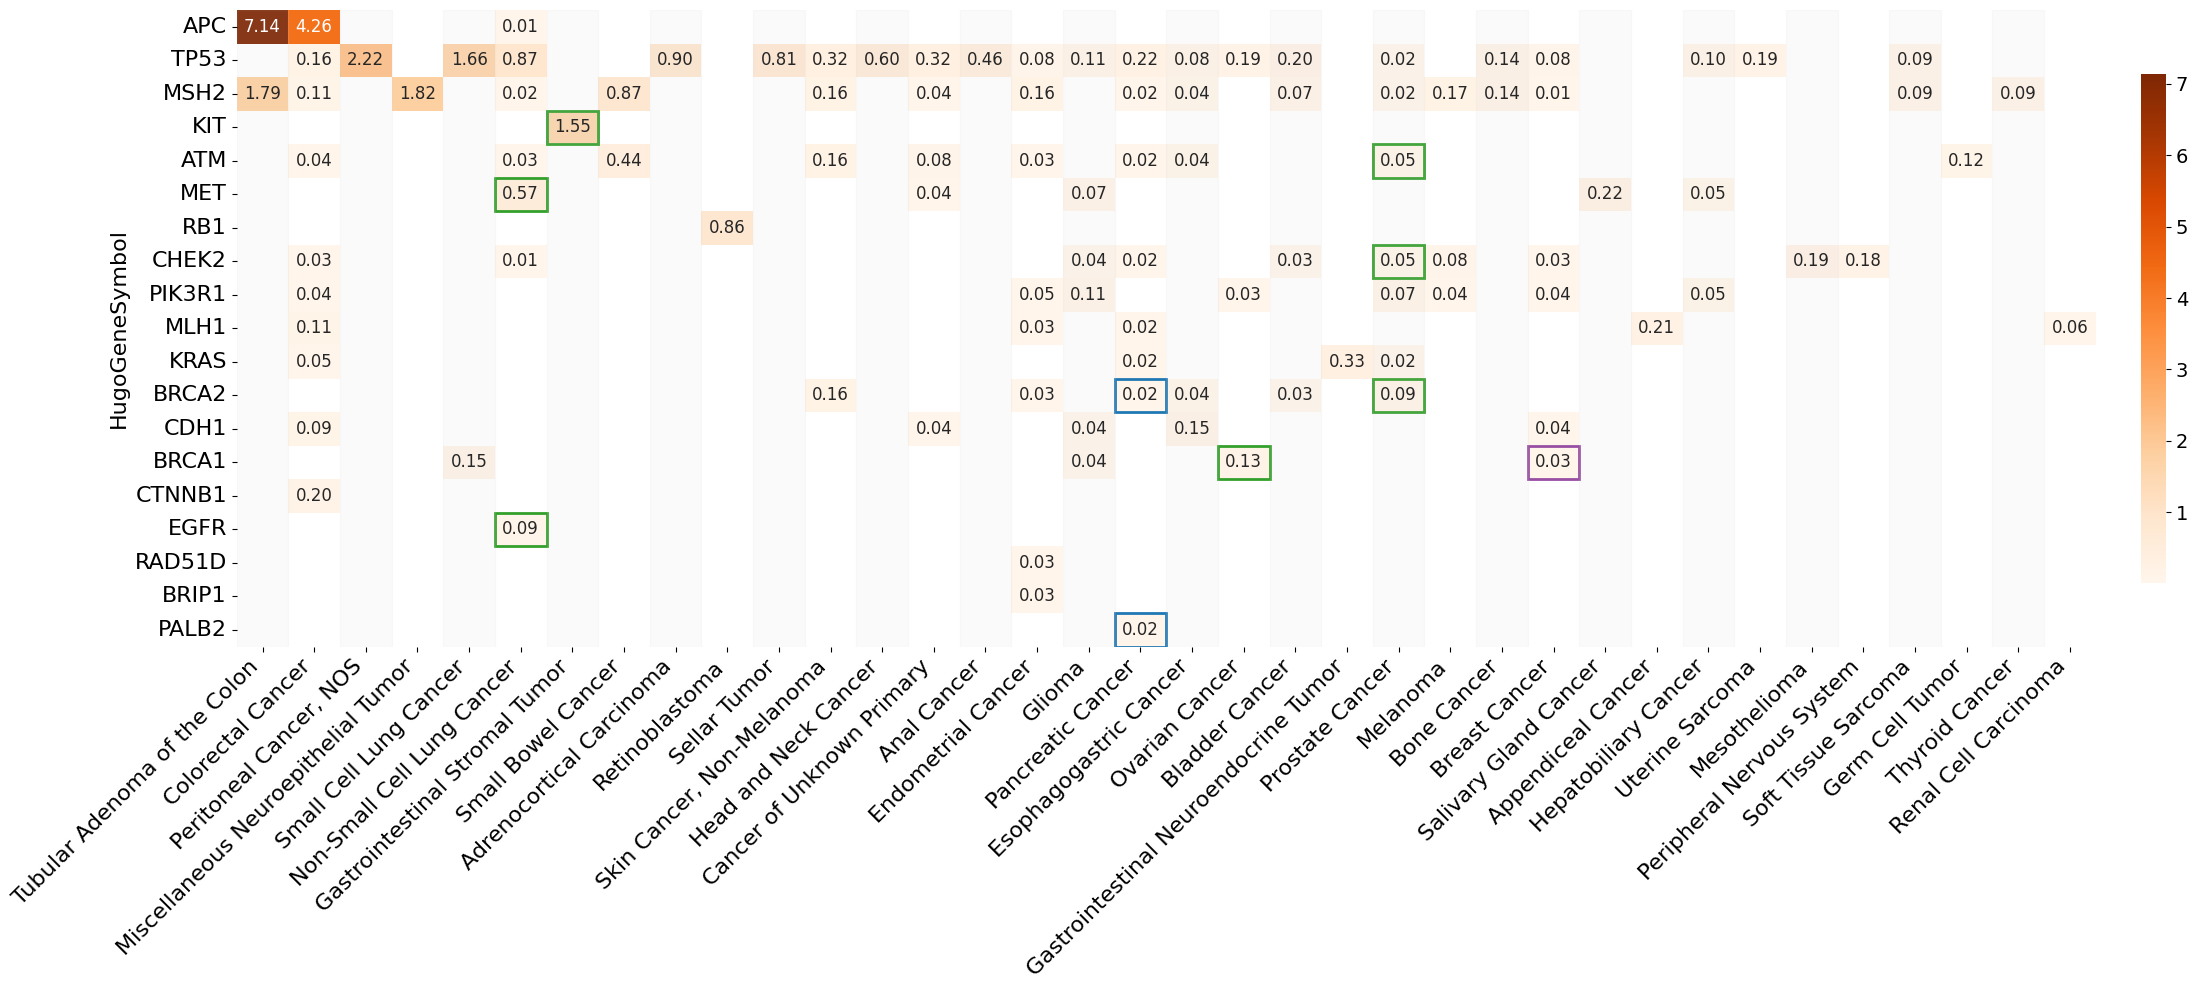

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd


level_palette = {
    'Level 1': '#33A02C',
    'Level 2': '#1F78B4',
    'Level 3A': '#984EA3',
    'Level 3B': '#BE98CE',
    'Level 4': '#424242',
    'R1': '#EE3424',
    'R2': '#F79A92',
    'R3': '#FCD6D3' 
}

highlight_map = {
    'APC': {},
    'ATM': {'Prostate Cancer': 'Level 1'},
    'BAP1': {},
    'BRCA1': {
        'Prostate Cancer': 'Level 1',
        'Ovarian Cancer': 'Level 1',
        'Pancreatic Cancer': 'Level 2',
        'Breast Cancer': 'Level 3A'
    },
    'BRCA2': {
        'Prostate Cancer': 'Level 1',
        'Ovarian Cancer': 'Level 1',
        'Pancreatic Cancer': 'Level 2',
        'Uterine Sarcoma': 'Level 1',
        'Breast Cancer': 'Level 3A'
    },
    'BRIP1': {'Prostate Cancer': 'Level 1'},
    'CDH1': {},
    'CHEK2': {'Prostate Cancer': 'Level 1'},
    'CTNNB1': {},
    'EGFR': {
        'Non-Small Cell Lung Cancer': 'Level 1',
        'Esophagogastric Cancer': 'Level 3A',
        'Glioma': 'Level 4',
        'Colorectal Cancer': 'R2'
    },
    'F11': {},
    'FLT3': {'Leukemia': 'Level 1'},
    'KIT': {
        'Gastrointestinal Stromal Tumor': 'Level 1',
        'Mastocytosis': 'Level 1',
        'Melanoma': 'Level 2'
    },
    'KRAS': {},
    'MET': {'Non-Small Cell Lung Cancer': 'Level 1'},
    'MLH1': {'Prostate Cancer': 'Level 1'},
    'MSH2': {},
    'PALB2': {
        'Prostate Cancer': 'Level 1',
        'Pancreatic Cancer': 'Level 2'
    },
    'PIK3R1': {},
    'RAD51D': {'Prostate Cancer': 'Level 1'},
    'RB1': {},
    'TP53': {}
}

def totol_count_sum(row):
    result = {}
    for cancer_type in cancer_types:
        result[f'counts.CancerType.{cancer_type}'] = 0
        result[f'counts.CancerType.{cancer_type}'] += (
            row.get(f'counts.total.somaticVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
            row.get(f'counts.total.germlineVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
            row.get(f'counts.total.unknownVariantsCountByCancerType.{cancer_type}', np.array(0)).sum()
        )
    return pd.Series(result)

# process mskimapct only
df = pd.DataFrame(pd.read_json('./VUEs_mskimpact_count.json'))

# Normalize the 'revisedProteinEffects' column
normalized_dfs = []
for index, row in df.iterrows():
    normalized_row = pd.json_normalize(row['revisedProteinEffects'])
    repeated_row = pd.DataFrame([row.drop('revisedProteinEffects')] * len(normalized_row)).reset_index(drop=True)
    combined = pd.concat([repeated_row.reset_index(drop=True), normalized_row], axis=1).reset_index(drop=True)
    normalized_dfs.append(combined)

# Determine the union of all column names
all_columns = set()
for df in normalized_dfs:
    all_columns.update(df.columns)

# Reindex each DataFrame to include all columns, filling missing values with NaN
all_columns = list(all_columns)
for i, df in enumerate(normalized_dfs):
    normalized_dfs[i] = df.loc[:, ~df.columns.duplicated()].reindex(columns=all_columns)

# Concatenate all normalized DataFrames
mskimpact_by_cancertype_df = pd.concat(normalized_dfs, ignore_index=True)
# make anything CountByVariantCount 0
count_cancer_type_columns = [col for col in mskimpact_by_cancertype_df.columns if 'CountByCancerType' in col]
mskimpact_by_cancertype_df[count_cancer_type_columns] = mskimpact_by_cancertype_df[count_cancer_type_columns].fillna(0).astype(int)
cancer_types = set([c.split('.')[-1] for c in mskimpact_by_cancertype_df.columns if "CancerType" in c])

# Group by 'hugoGeneSymbol' and apply custom function
grouped_df = mskimpact_by_cancertype_df.groupby('hugoGeneSymbol').apply(totol_count_sum)


heatmap_data = grouped_df.filter(like='counts.CancerType.')
heatmap_data.columns = [col.replace('counts.CancerType.', '') for col in heatmap_data.columns]
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1) != 0]
for col in heatmap_data.columns:
    heatmap_data[col] = heatmap_data[col] * 100.0 / patien_count_df_out.loc[f'mskimpct_combined.{col}']['patient_count']

heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]
heatmap_data = heatmap_data[heatmap_data.sum(axis=0).sort_values(ascending=False).index]


# Plot the heatmap
plt.figure(figsize=(25, 10))
# add n=10 to the x axis lables of the heatmap
ax = sns.heatmap(heatmap_data, cmap='Oranges', annot=True, fmt='.2f', mask=heatmap_data == 0, annot_kws={"fontsize": 12}, cbar_kws={'shrink': 0.8, 'pad': 0.02} )
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=14)

# Overlay colored boxes for matching gene × cancer_type × level
for row_idx, gene in enumerate(heatmap_data.index):
    for col_idx, cancer_type in enumerate(heatmap_data.columns):
        cell_value = heatmap_data.loc[gene, cancer_type]
        if cell_value == 0 or np.isnan(cell_value):
            continue

        highlight_entry = highlight_map.get(gene, {})
        if highlight_entry == 'all' or 'all' in highlight_entry:
            level = highlight_entry.get('all')
        else:
            level = highlight_entry.get(cancer_type)

        if level in level_palette:
            ax.add_patch(Rectangle(
                (col_idx, row_idx), 1, 1,
                fill=False,
                edgecolor=level_palette[level],
                linewidth=2
            ))

# Rotate long cancer type labels
plt.xticks(rotation=45, ha='right')

# Add vertical minor ticks at cell boundaries
ax.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5, minor=True)
ax.grid(which='minor', axis='x', linestyle='-', color='lightgray', linewidth=0.5)
ax.tick_params(axis='x', which='minor', bottom=False)

# Add alternating column background stripes for readability
for idx in range(0, len(heatmap_data.columns), 2):
    ax.axvspan(idx, idx + 1, color='lightgrey', alpha=0.1)

# Add y-axis ticks for horizontal line support
ax.set_yticks(np.arange(len(heatmap_data.index)) + 0.5, minor=True)
ax.grid(which='minor', axis='y', linestyle='-', color='lightgray', linewidth=0.5)
ax.tick_params(axis='y', which='minor', left=False)

plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('HugoGeneSymbol', fontsize=16)
plt.tight_layout()
# plt.savefig("revue_percentage_plot.svg", format='svg')
# plt.show()
# only msk-impact
# heatmap of APC (x is APC + tubular adenoma, y is cohorts), KIT + GIST

In [112]:
grouped_df

,counts.CancerType.Soft Tissue Sarcoma,counts.CancerType.Esophagogastric Cancer,counts.CancerType.Prostate Cancer,counts.CancerType.Bladder Cancer,"counts.CancerType.Peritoneal Cancer, NOS",counts.CancerType.Appendiceal Cancer,counts.CancerType.Bone Cancer,counts.CancerType.Breast Cancer,counts.CancerType.Anal Cancer,counts.CancerType.Hepatobiliary Cancer,...,counts.CancerType.Head and Neck Cancer,counts.CancerType.Miscellaneous Neuroepithelial Tumor,counts.CancerType.Uterine Sarcoma,counts.CancerType.Salivary Gland Cancer,counts.CancerType.Mesothelioma,counts.CancerType.Sellar Tumor,counts.CancerType.Pancreatic Cancer,counts.CancerType.Renal Cell Carcinoma,counts.CancerType.Endometrial Cancer,counts.CancerType.Peripheral Nervous System
hugoGeneSymbol,,,,,,,,,,,,,,,,,,,,,
APC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATM,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
BAP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRCA1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
BRCA2,0,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
BRIP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CDH1,0,4,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEK2,0,0,2,1,0,0,0,2,0,0,...,0,0,0,0,1,0,1,0,0,1
CTNNB1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


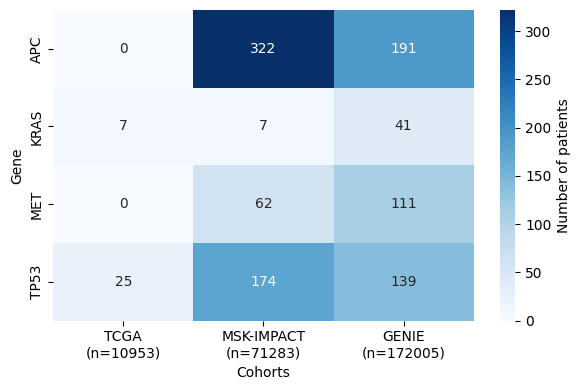

In [86]:
# maybe remove msk-impact patients from GENIE?
# select genes
selected_genes = ["APC", "MET", "TP53", "KRAS"]

filtered_pct_df = grouped_df[grouped_df.index.isin(selected_genes)].copy()
filtered_pct_df["mskimpact"] = (
    filtered_pct_df["mskimpact"] + filtered_pct_df["mskimpact_nonsignedout"]
)
plot_pct_df = filtered_pct_df[["tcga", "mskimpact", "genie"]]
plot_pct_df.columns = ["TCGA\n(n=10953)", "MSK-IMPACT\n(n=71283)", "GENIE\n(n=172005)"]

plt.figure(figsize=(6, 4))
sns.heatmap(plot_pct_df, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Number of patients'})

plt.xlabel("Cohorts")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

In [59]:
filtered_pct_df

,tcga,tcga.totalPatientCount,mskimpact,mskimpact.totalPatientCount,mskimpact_nonsignedout,mskimpact_nonsignedout.totalPatientCount,genie,genie.totalPatientCount,total,total.totalPatientCount,...,counts.CancerType.Pancreatic Cancer,counts.CancerType.Hodgkin Lymphoma,counts.CancerType.Renal Cell Carcinoma,counts.CancerType.Endometrial Cancer,counts.CancerType.Peripheral Nervous System,counts.CancerType.Breast Sarcoma,Number of VUEs,total_variant_count,Highest_Level,total_patient_count
hugoGeneSymbol,,,,,,,,,,,,,,,,,,,,,
APC,0.0,10953.0,1.0,70067.0,321.0,71283.0,191.0,172005.0,513.0,193482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,513.0,Oncogenic,513.0
MET,0.0,10953.0,58.0,70067.0,4.0,71283.0,111.0,172005.0,122.0,193482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19,122.0,Level 1,122.0
TP53,25.0,10953.0,0.0,70067.0,174.0,71283.0,139.0,172005.0,338.0,193482.0,...,11.0,0.0,1.0,5.0,0.0,0.0,2,338.0,Oncogenic,338.0


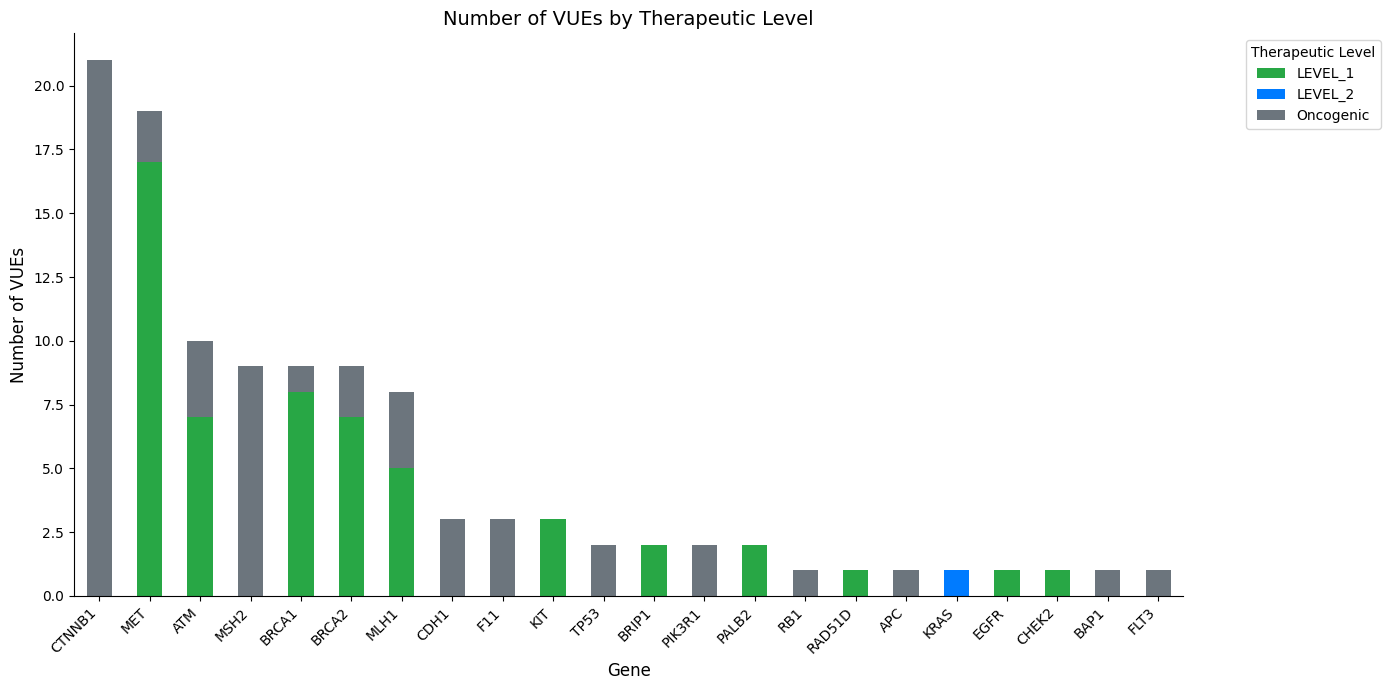

In [26]:
# Fill nulls with "Oncogenic"
result_df['therapeuticLevel'] = result_df['therapeuticLevel'].fillna('Oncogenic')

# Group by gene and therapeutic level → count VUEs
grouped_counts = result_df.groupby(['hugoGeneSymbol', 'therapeuticLevel']).size().unstack(fill_value=0)
# Sort genes by total number of VUEs
grouped_counts = grouped_counts.loc[grouped_counts.sum(axis=1).sort_values(ascending=False).index]

# Ensure consistent column order
level_palette = {
    'LEVEL_1': '#28a745',   # Green
    'LEVEL_2': '#007bff',   # Dark Blue
    'Oncogenic': '#6c757d'  # Gray
}
all_levels = list(level_palette.keys())
grouped_counts = grouped_counts.reindex(columns=all_levels, fill_value=0)

# Plot stacked bar chart
ax = grouped_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    color=[level_palette[level] for level in grouped_counts.columns]
)

# Plot formatting
plt.title(f"Number of VUEs by Therapeutic Level", fontsize=14)
plt.xlabel("Gene", fontsize=12)
plt.ylabel("Number of VUEs", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Therapeutic Level", bbox_to_anchor=(1.05, 1), loc="upper left")
sns.despine()
plt.tight_layout()
plt.show()





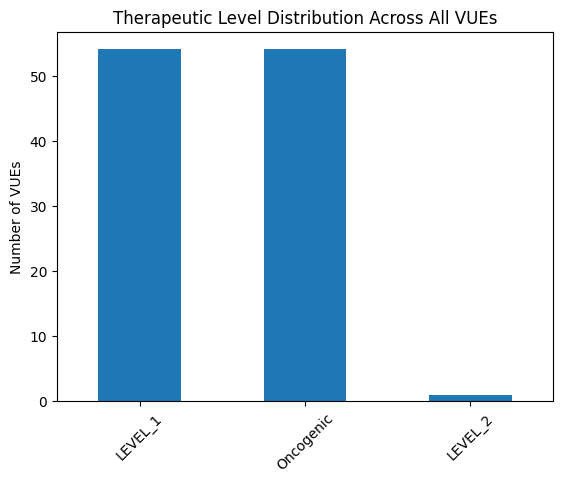

In [409]:
result_df['therapeuticLevel'].value_counts().plot(kind='bar')
plt.title("Therapeutic Level Distribution Across All VUEs")
plt.ylabel("Number of VUEs")
plt.xticks(rotation=45)
plt.show()

In [8]:
# create input for mutationmapper tool

# Create new DataFrame with the specified columns
new_data = {
    'Sample_ID': [],
    'Cancer_Type': [],
    'Chromosome': [],
    'Start_Position': [],
    'End_Position': [],
    'Reference_Allele': [],
    'Variant_Allele': []
}

# Fill in the new DataFrame
for location in result_df['genomicLocation']:
    try:
        chrom, start, end, ref, alt = location.split(',')
    except ValueError:
        continue
    new_data['Sample_ID'].append(f'Sample_{np.random.randint(1, 1000)}')
    new_data['Cancer_Type'].append(np.random.choice(['Lung', 'Breast', 'Colon', 'Prostate', 'Leukemia']))
    new_data['Chromosome'].append(chrom)
    new_data['Start_Position'].append(start)
    new_data['End_Position'].append(end)
    new_data['Reference_Allele'].append(ref)
    new_data['Variant_Allele'].append(alt)

new_df = pd.DataFrame(new_data)

# Copy the new DataFrame for pasting into MutationMapperTool
new_df.to_clipboard(index=False)
